In [195]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [196]:
from OneHotEncoding import get_one_hot_sequence
from BuildMatrixFromDotBracket import get_couples, build_matrix

In [197]:
example_structure = "...(((((((..((((((.........))))))......).((((((.......))))))..))))))..."
example_sequence = "CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUG"
example_length = len(example_sequence)

# Get one-hot encoded sequence (X) and adjacency matrix (y) of example data
example_one_hot = get_one_hot_sequence(example_sequence)
example_matrix = build_matrix(get_couples(example_structure), example_length)

# Creating the model

In [198]:
# Define the input layer to accept one-hot encoded sequences
input_layer = tf.keras.layers.Input(shape=(example_length, 4))

In [199]:
# Process sequences using an LSTM layer, returning all outputs
lstm_layer = tf.keras.layers.LSTM(units=64, return_sequences=True)(input_layer)

In [200]:
# Flatten the LSTM output into a 1D vector
flattened = tf.keras.layers.Flatten()(lstm_layer)

In [201]:
# Create a dense output layer with sigmoid activation for probabilities
output_layer = tf.keras.layers.Dense(example_length * example_length, activation='sigmoid')(flattened)

In [202]:
# Reshape the output into a 2D adjacency matrix
adjacency_matrix = tf.reshape(output_layer, (-1, example_length, example_length))

In [203]:
# Construct the model, specifying input and output layers
model = tf.keras.Model(inputs=input_layer, outputs=adjacency_matrix)

In [204]:
# Configure the model for training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [205]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 71, 4)]           0         
                                                                 
 lstm_19 (LSTM)              (None, 71, 64)            17664     
                                                                 
 flatten_15 (Flatten)        (None, 4544)              0         
                                                                 
 dense_16 (Dense)            (None, 5041)              22911345  
                                                                 
 tf.reshape_15 (TFOpLambda)  (None, 71, 71)            0         
                                                                 
Total params: 22929009 (87.47 MB)
Trainable params: 22929009 (87.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [212]:
# Reshape input data to match model's expected shape
example_one_hot = example_one_hot.reshape(1, 71, 4)
example_matrix = example_matrix.reshape(1, 71, 71)
print(example_one_hot.shape, example_matrix.shape)

(1, 71, 4) (1, 71, 71)


In [213]:
# Train the model with input and target data for 10 epochs
history = model.fit(example_one_hot, example_matrix, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6932 - accuracy: 0.0141
Epoch 2/10
1/1 [==============================] - 0s 178ms/step - loss: 0.6321 - accuracy: 0.4789
Epoch 3/10
1/1 [==============================] - 0s 175ms/step - loss: 0.5625 - accuracy: 0.4648
Epoch 4/10
1/1 [==============================] - 0s 178ms/step - loss: 0.4864 - accuracy: 0.4648
Epoch 5/10
1/1 [==============================] - 0s 187ms/step - loss: 0.4058 - accuracy: 0.4789
Epoch 6/10
1/1 [==============================] - 0s 232ms/step - loss: 0.3230 - accuracy: 0.4930
Epoch 7/10
1/1 [==============================] - 0s 177ms/step - loss: 0.2413 - accuracy: 0.4789
Epoch 8/10
1/1 [==============================] - 0s 186ms/step - loss: 0.1651 - accuracy: 0.4789
Epoch 9/10
1/1 [==============================] - 0s 191ms/step - loss: 0.0998 - accuracy: 0.4789
Epoch 10/10
1/1 [==============================] - 0s 197ms/step - loss: 0.0505 - accuracy: 0.4930


In [215]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy
0,0.693203,0.014085
1,0.632065,0.478873
2,0.562467,0.464789
3,0.486421,0.464789
4,0.405829,0.478873


<Axes: >

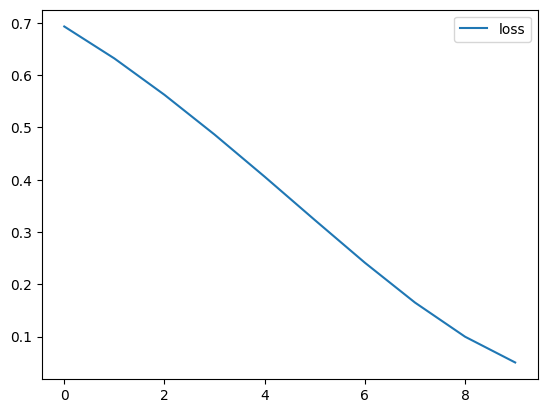

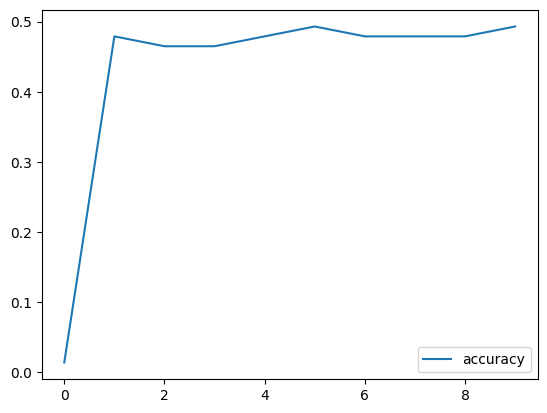

In [216]:
# Plot the loss and accuracy
history_df.loc[:, ['loss']].plot()
history_df.loc[:, ['accuracy']].plot()